In [1]:
from results import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
sns.set()

In [3]:
def extract_data(label, data_dict, denominator_dict, normalize):
    mean_list = list()
    std_list = list()
    if normalize:
        factor = denominator_dict[label]
    else:
        factor = 1
    for iter_nb in range(5):
        mean_list.append(data_dict[iter_nb][label]['mean']/factor)
        std_list.append(data_dict[iter_nb][label]['sem']/factor)
    return mean_list, std_list

In [9]:
def extract_data_new(label, data_dict, denominator_dict, normalize):
    mean_list = list()
    std_list = list()
    if normalize:
        factor = denominator_dict[label]
    else:
        factor = 1
    for iter_nb in range(4):
        mean_list.append(data_dict[iter_nb][label]['numerator']/factor)
        std_list.append(data_dict[iter_nb][label]['sem']/factor)
    if 4 in data_dict.keys():
        mean_list.append(data_dict[4][label]['numerator']/factor)
        std_list.append(data_dict[4][label]['sem']/factor)
    return mean_list, std_list

In [5]:
labels=['is_hired_1mo', 'is_unemployed', 'job_offer', 'job_search', 'lost_job_1mo']

In [6]:
output_path = '/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/fig/expansion'

In [7]:
iter_nb = range(5)

## Old

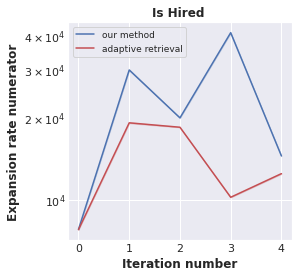

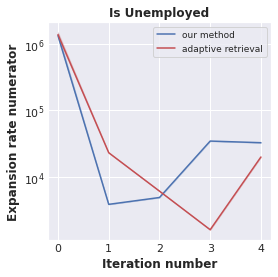

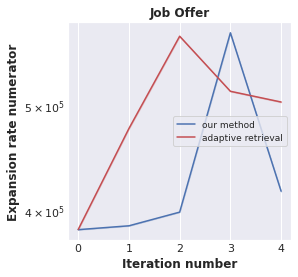

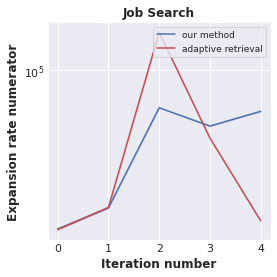

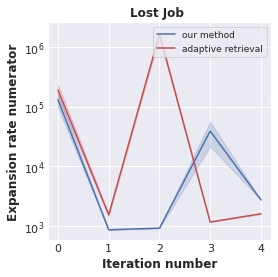

In [9]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    mean_list_our_method, std_list_our_method = extract_data(label, our_method_dict, denominator_dict, normalize=False)
    mean_list_adaptive, std_list_adaptive = extract_data(label, adaptive_dict, denominator_dict, normalize=False)
    ax.plot(iter_nb, mean_list_our_method, 'b-', label='our method')
    ax.fill_between(iter_nb, list(np.array(mean_list_our_method) - np.array(std_list_our_method)), list(np.array(mean_list_our_method) + np.array(std_list_our_method)), color='b', alpha=0.2)
    ax.plot(iter_nb, mean_list_adaptive, 'r-', label='adaptive retrieval')
    ax.fill_between(iter_nb, list(np.array(mean_list_adaptive) - np.array(std_list_adaptive)), list(np.array(mean_list_adaptive) + np.array(std_list_adaptive)), color='r', alpha=0.2)
    ax.set_yscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
#     ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Expansion rate numerator',fontweight='bold')
    ax.set_xlabel('Iteration number',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(output_path,f'numerator_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

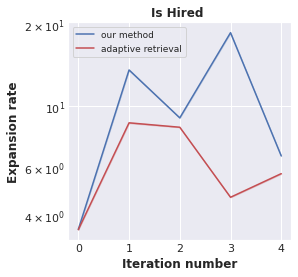

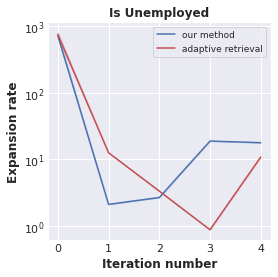

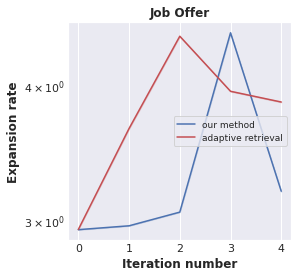

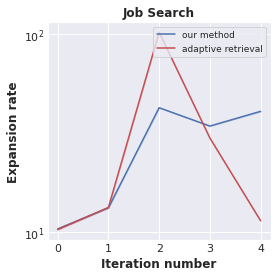

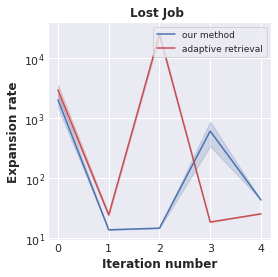

In [11]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    mean_list_our_method, std_list_our_method = extract_data(label, our_method_dict, denominator_dict, normalize=True)
    mean_list_adaptive, std_list_adaptive = extract_data(label, adaptive_dict, denominator_dict, normalize=True)
    ax.plot(iter_nb, mean_list_our_method, 'b-', label='our method')
    ax.fill_between(iter_nb, list(np.array(mean_list_our_method) - np.array(std_list_our_method)), list(np.array(mean_list_our_method) + np.array(std_list_our_method)), color='b', alpha=0.2)
    ax.plot(iter_nb, mean_list_adaptive, 'r-', label='adaptive retrieval')
    ax.fill_between(iter_nb, list(np.array(mean_list_adaptive) - np.array(std_list_adaptive)), list(np.array(mean_list_adaptive) + np.array(std_list_adaptive)), color='r', alpha=0.2)
    ax.set_yscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
#     ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration number',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(output_path,f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

## New

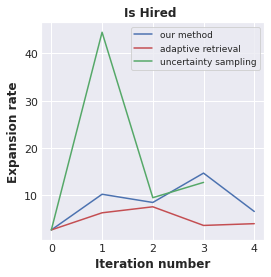

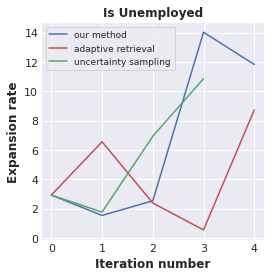

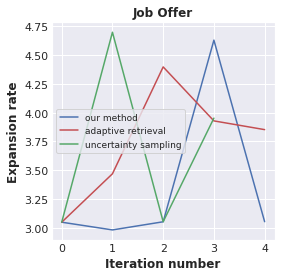

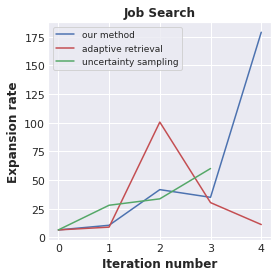

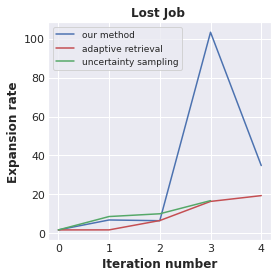

In [11]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    mean_list_our_method, std_list_our_method = extract_data_new(label, our_method_new_dict, denominator_dict, normalize=True)
    mean_list_adaptive, std_list_adaptive = extract_data_new(label, adaptive_new_dict, denominator_dict, normalize=True)
    mean_list_uncertainty, std_list_uncertainty = extract_data_new(label, uncertainty_new_dict, denominator_dict, normalize=True)
    ax.plot(iter_nb, mean_list_our_method, 'b-', label='our method')
#     ax.fill_between(iter_nb, list(np.array(mean_list_our_method) - np.array(std_list_our_method)), list(np.array(mean_list_our_method) + np.array(std_list_our_method)), color='b', alpha=0.2)
    ax.plot(iter_nb, mean_list_adaptive, 'r-', label='adaptive retrieval')
#     ax.fill_between(iter_nb, list(np.array(mean_list_adaptive) - np.array(std_list_adaptive)), list(np.array(mean_list_adaptive) + np.array(std_list_adaptive)), color='r', alpha=0.2)
    ax.plot(range(4), mean_list_uncertainty, 'g-', label='uncertainty sampling')
#     ax.set_yscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
#     ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration number',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(output_path,f'{label}_extra.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)